In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

aapl_path = "../data/aapl_us_2025.csv"
tsla_path = "../data/tsla_raw_data.csv"
amzn_path = "../data/amzn_raw_data.csv"
msft_path = "../data/Microsoft_stock_data.csv"

start = "2010-06-29"
end = "2024-04-15"

AAPL = pd.read_csv(aapl_path)
AAPL = AAPL.set_index(pd.to_datetime(AAPL["Date"])).drop(["Date"], axis = 1)
AAPL = AAPL[AAPL.index > start]
AAPL = AAPL[AAPL.index < end]
AAPL.index.name = "AAPL"

TSLA = pd.read_csv(tsla_path)
TSLA = TSLA.set_index(pd.to_datetime(TSLA["date"])).drop(["date", "adjusted_close", "change_percent", "avg_vol_20d"], axis = 1)
TSLA = TSLA[TSLA.index > start]
TSLA = TSLA[TSLA.index < end]
TSLA.index.name = "TSLA"

AMZN = pd.read_csv(amzn_path)
AMZN = AMZN.set_index(pd.to_datetime(AMZN["date"])).drop(["date", "adjusted_close", "change_percent", "avg_vol_20d"], axis = 1)
AMZN = AMZN[AMZN.index > start]
AMZN = AMZN[AMZN.index < end]
AMZN.index.name = "AMZN"

MSFT = pd.read_csv(msft_path)
MSFT = MSFT.set_index(pd.to_datetime(MSFT["Date"])).drop(["Date"], axis = 1)
MSFT = MSFT[MSFT.index > start]
MSFT = MSFT[MSFT.index < end]
MSFT.index.name = "MSFT"

TSLA = TSLA.rename(columns={"open":"Open",
                           "high":"High",
                           "low":"Low",
                           "close":"Close",
                           "volume":"Volume"})

AMZN = AMZN.rename(columns={"open":"Open",
                           "high":"High",
                           "low":"Low",
                           "close":"Close",
                           "volume":"Volume"})

stocks = [AAPL, TSLA, AMZN, MSFT]

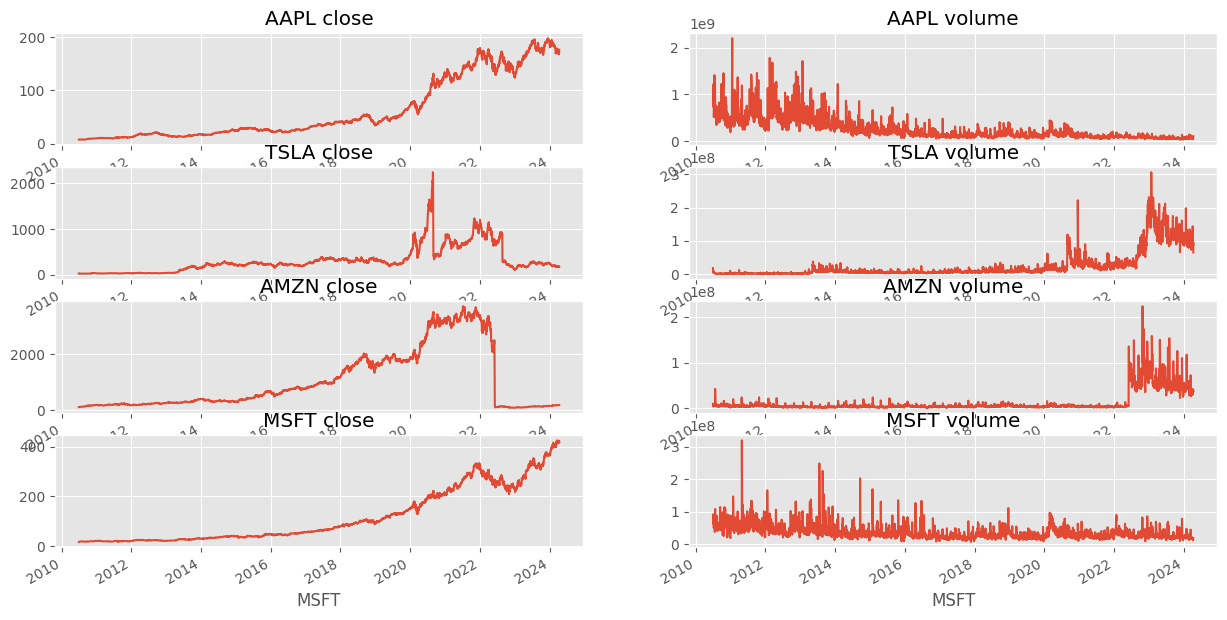

In [14]:

plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for stock, i in zip(stocks, list(range(1,len(stocks)*2+1,2))):
    plt.subplot(len(stocks)*2, 2, i)
    stock["Close"].plot()
    plt.title(f"{stock.index.name} close")
    plt.subplot(len(stocks)*2, 2, i+1)
    stock["Volume"].plot()
    plt.title(f"{stock.index.name} volume")

plt.show()

In [15]:
moving_avg = [10, 20, 50]

for ma in moving_avg:
    for stock in stocks:
        col = f"{ma} day average"
        stock[col] = stock["Close"].rolling(ma).mean()

TSLA

Open      High       Low     Close     Volume  10 day average  \
TSLA                                                                            
2010-06-30   25.7901   30.4191   23.3001   23.8299   17194392             NaN   
2010-07-01   24.9999   25.9200   20.2701   21.9600    8229862             NaN   
2010-07-02   23.0001   23.1000   18.7101   19.2000    5141806             NaN   
2010-07-06   20.0001   20.0001   15.8301   16.1100    6879295             NaN   
2010-07-07   16.4001   16.6299   14.9799   15.8001    6924913             NaN   
...              ...       ...       ...       ...        ...             ...   
2024-04-08  169.3400  174.5000  167.7900  172.9800  104423297         172.514   
2024-04-09  172.9100  179.2200  171.9200  176.8800  103232703         172.939   
2024-04-10  173.0400  174.9300  170.0100  171.7600   84532406         172.348   
2024-04-11  172.5500  175.8800  168.5100  174.6000   94515992         171.825   
2024-04-12  172.3400  173.8099  170.3644  171.0500   64722672         171.351   

            20 day average  50 day average  
TSLA                                        
2010-06-30             NaN             NaN  
2010-07-01             NaN             NaN  
2010-07-02             NaN             NaN  
2010-07-06             NaN             NaN  
2010-07-07             NaN             NaN  
...                    ...             ...  
2024-04-08        172.0215        183.0280  
2024-04-09        171.9770        182.9006  
2024-04-10        171.6880        182.5172  
2024-04-11        171.9440        182.1774  
2024-04-12        172.3715        181.8526  

[3470 rows x 8 columns]

In [16]:
for stock in stocks:
    stock["Daily Return"] = stock["Close"].pct_change()

AAPL

Open       High        Low      Close        Volume  \
AAPL                                                                   
2010-06-30    7.74275    7.78046    7.54095    7.58611  8.741840e+08   
2010-07-01    7.66393    7.68466    7.33563    7.49474  1.210385e+09   
2010-07-02    7.56051    7.56761    7.33493    7.44742  8.216020e+08   
2010-07-06    7.44742    7.62501    7.42500    7.49938  7.276023e+08   
2010-07-07    7.55853    7.80398    7.53236    7.80051  7.729481e+08   
...               ...        ...        ...        ...           ...   
2024-04-08  168.60600  168.77600  167.81800  168.02800  3.751965e+07   
2024-04-09  168.27600  169.65400  167.92800  169.24400  4.255799e+07   
2024-04-10  168.37600  168.66600  166.69100  167.35900  4.983437e+07   
2024-04-11  167.91800  175.01900  167.73800  174.60100  9.129935e+07   
2024-04-12  173.82300  177.91200  173.77300  176.10700  1.019266e+08   

            10 day average  20 day average  50 day average  Daily Return  
AAPL                                                                      
2010-06-30             NaN             NaN             NaN           NaN  
2010-07-01             NaN             NaN             NaN     -0.012044  
2010-07-02             NaN             NaN             NaN     -0.006314  
2010-07-06             NaN             NaN             NaN      0.006977  
2010-07-07             NaN             NaN             NaN      0.040154  
...                    ...             ...             ...           ...  
2024-04-08        169.6453       171.34750       177.93256     -0.006657  
2024-04-09        169.5275       171.19385       177.48358      0.007237  
2024-04-10        169.3350       170.92205       177.01064     -0.011138  
2024-04-11        169.5076       171.11710       176.75608      0.043272  
2024-04-12        170.0133       171.29415       176.60416      0.008625  

[3470 rows x 9 columns]

In [17]:
df_close = pd.DataFrame()

for stock in stocks:
    name = stock.index.name
    col = stock["Close"]
    df_close[name] = col

returns = df_close.pct_change().dropna()

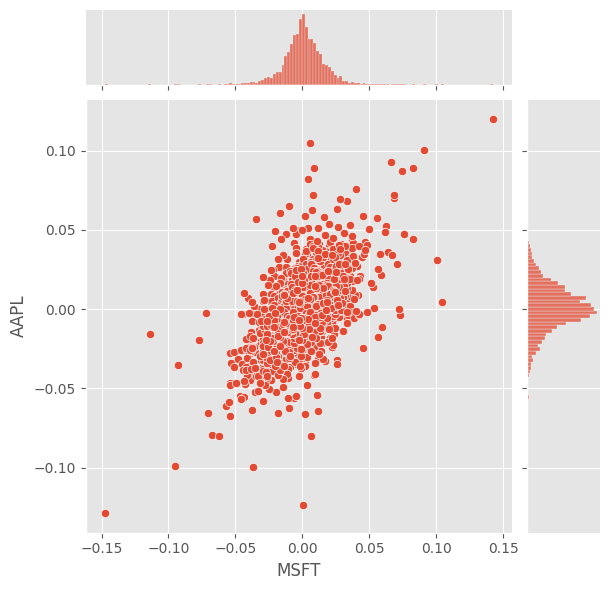

In [18]:
sns.jointplot(x="MSFT", y="AAPL", data=returns, kind="scatter")

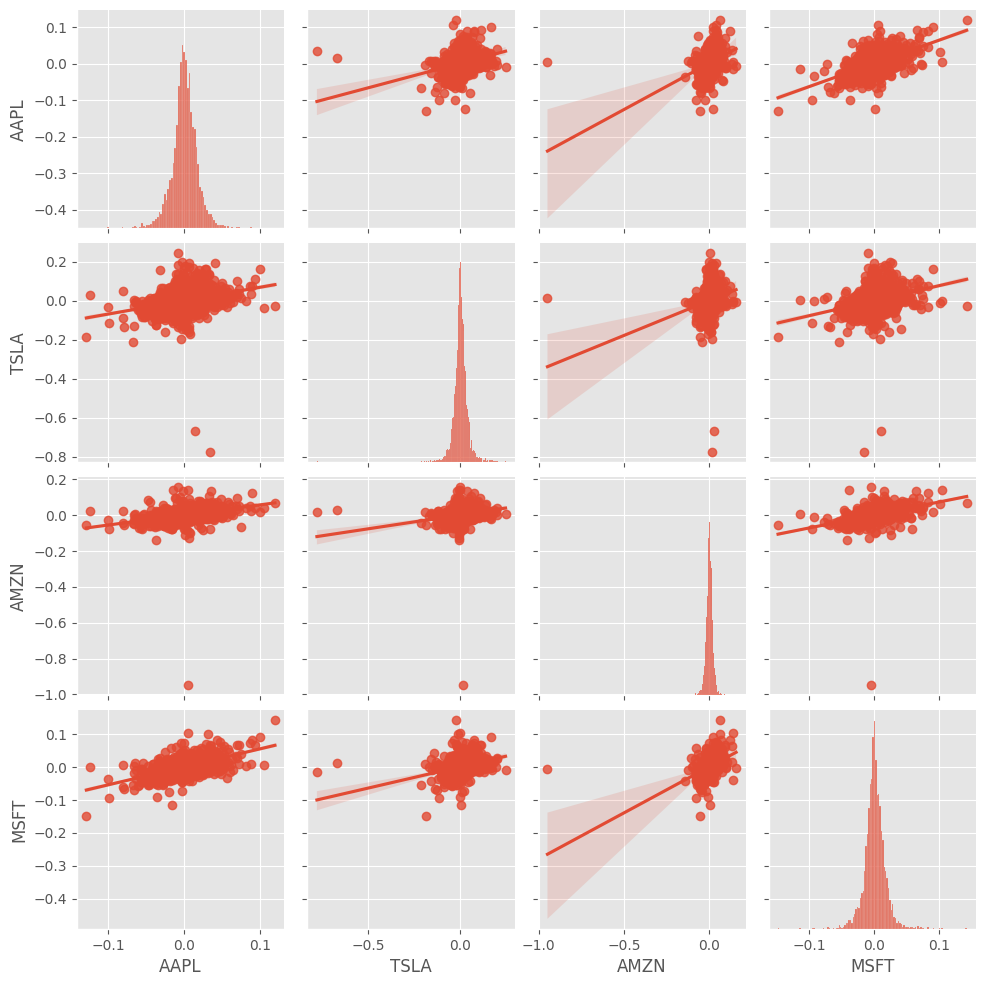

In [19]:
sns.pairplot(returns, kind="reg")

<Axes: >

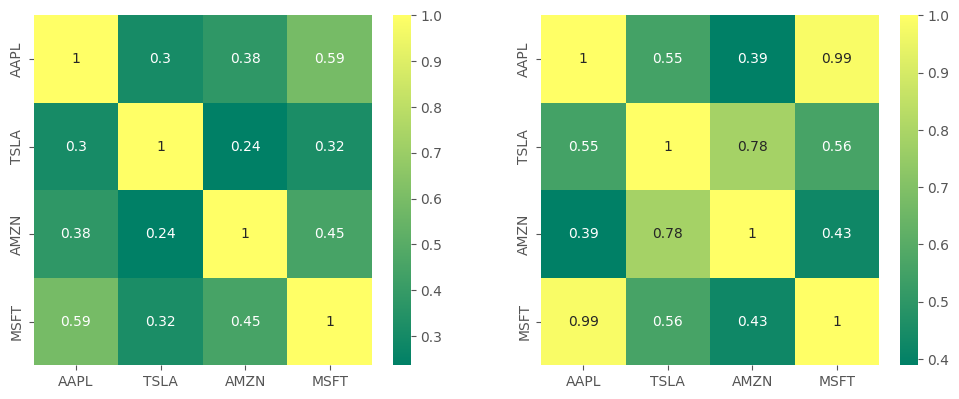

In [20]:
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
sns.heatmap(returns.corr(), annot=True, cmap="summer")
plt.subplot(2,2,2)
sns.heatmap(df_close.corr(), annot=True, cmap="summer")

In [24]:
path = "../data_cleaned"

for stock in stocks:
    stock.to_csv(os.path.join(path, stock.index.name+".csv"))